In [214]:
import numpy as np
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPooling2D, ZeroPadding2D, Dropout, Flatten, Input, Activation
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.datasets import fashion_mnist
from keras.initializers import glorot_uniform
from keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn')
% matplotlib inline

## Download and explore data

In [186]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [187]:
print('The shape of x_train is: {}'.format(x_train.shape))
print('The shape of y_train is : {}'.format(y_train.shape))
print('The shape of x_test is: {}'.format(x_test.shape))
print('The shape of y_test is {}'.format(y_test.shape))

The shape of x_train is: (60000, 28, 28)
The shape of y_train is : (60000,)
The shape of x_test is: (10000, 28, 28)
The shape of y_test is (10000,)


In [181]:
# check a few random examples
x_train[np.random.randint(len(x_train)),:,:]#.shape
y_train[np.random.randint(len(y_train))]

2

## Data Visualization

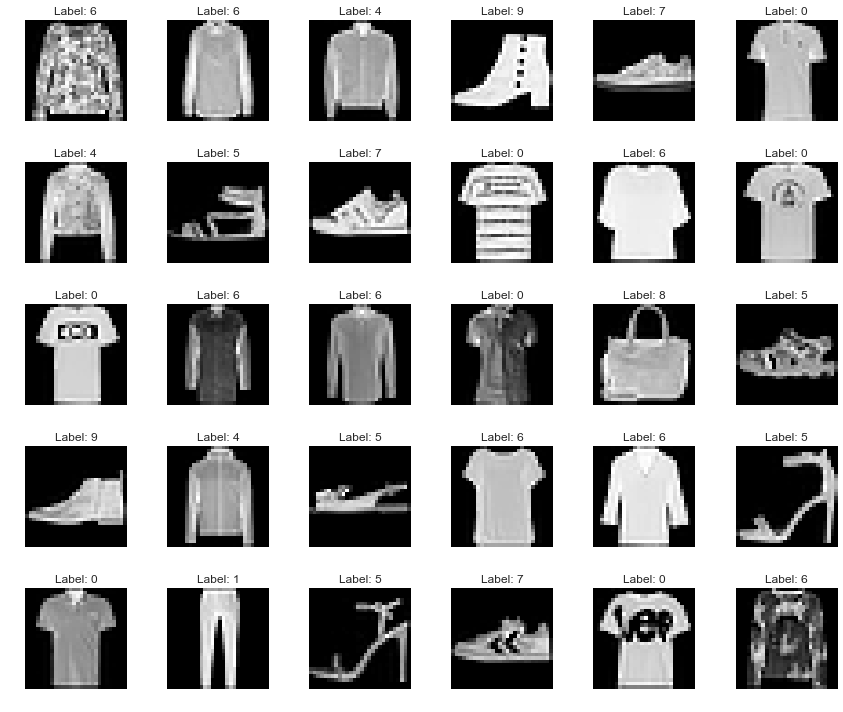

In [216]:
# Display random sample of images and their labels

fig, ax = plt.subplots(nrows=5, ncols = 6, figsize=(6*2,5*2))
idx = np.random.choice(len(y_train), size = 30)
labels = y_train[idx]
for i in range(len(idx)):
    ax[i%5,i%6].imshow(x_train[idx[i],:,:], cmap='gray')
    ax[i%5,i%6].set_title('Label: {}'.format(labels[i]))
    ax[i%5,i%6].set_axis_off()
fig.tight_layout()

## Data Preprocessing

In [188]:
# Normalization. Rescale from [0,255] to [0,1] range. Note change of variable names
X_train = x_train/255
X_test = x_test/255

# check results
print('The (min, max) values of x_train are: ({},{})'.format(X_train.min(), X_train.max()))
print('The (min, max) values of x_train are: ({},{})'.format(X_test.min(), X_test.max()))

The (min, max) values of x_train are: (0.0,1.0)
The (min, max) values of x_train are: (0.0,1.0)


In [194]:
# One-hot encoding for the output for the training data only
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

# check
print('The shape of Y_train is {}'.format(Y_train.shape))
print('The shape of Y_test is {}'.format(Y_test.shape))
print('Examples of Y_train:')
print(Y_train[np.random.randint(len(Y_train), size = 10),:])

The shape of Y_train is (60000, 10)
The shape of Y_test is (10000, 10)
Examples of Y_train:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [196]:
# Training data needs to be reshaped to play nicely with Keras layers
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# check:
print('The shape of X_train is: {}'.format(X_train.shape))
print('The shape of X_test is: {}'.format(X_test.shape))

The shape of X_train is: (60000, 28, 28, 1)
The shape of X_test is: (10000, 28, 28, 1)


## Build CNN Model

This model has all the bells and whistles. Let's see what happens...

In [175]:
def model(input_shape=(28,28,1), classes=10):
    
    # Input placeholder
    X_input = Input(input_shape)
    
    # Conv2D -> BN -> ReLU -> maxpool -> Dropout block applied 3 times
    X = Conv2D(16, (3,3), padding = 'same', strides=(1,1), name='Conv1')(X_input)
    X = BatchNormalization(axis=3, name='BN1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool1')(X)
    X = Dropout(0.1, name='Dropout1')(X)
    
    X = Conv2D(64, (3, 3), strides = (1, 1), padding = 'same', name = 'Conv2')(X)
    X = BatchNormalization(axis = 3, name = 'BN2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2), name='max_pool2')(X)
    X = Dropout(0.1, name='Dropout2')(X)

    X = Conv2D(256, (3, 3), strides = (1, 1), padding = 'same', name = 'Conv3')(X)
    X = BatchNormalization(axis = 3, name = 'BN3')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2), name='max_pool3')(X)
    X = Dropout(0.1, name='Dropout3')(X)

    X = Flatten()(X)
    
    # Fully connected layers
    X = Dense(128, activation = 'relu', name='FC1')(X)
    X = Dense(32, activation = 'relu', name='FC2')(X)
    X = Dense(classes, activation='softmax', name='FC3')(X)
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='CNN_MODEL1')
    
    return model

In [176]:
# Compile model, check summary, etc.
model = model()
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 28, 28, 16)        160       
_________________________________________________________________
BN1 (BatchNormalization)     (None, 28, 28, 16)        64        
_________________________________________________________________
activation_62 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 14, 14, 16)        0         
_________________________________________________________________
Dropout1 (Dropout)           (None, 14, 14, 16)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 14, 14, 64)        9280      
__________

Only ~ 460k parameters. That is *quite* small for a modern neural network. Let us see what happens...

## Training

In [177]:
history = model.fit(x=X_train, y=Y_train, validation_split=0.2, 
                batch_size=100, epochs=10, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 453s 9ms/step - loss: 0.5253 - acc: 0.8161 - val_loss: 0.3395 - val_acc: 0.8784
Epoch 2/10
48000/48000 [==============================] - 411s 9ms/step - loss: 0.3182 - acc: 0.8840 - val_loss: 0.2788 - val_acc: 0.8999
Epoch 3/10
48000/48000 [==============================] - 410s 9ms/step - loss: 0.2791 - acc: 0.8984 - val_loss: 0.3012 - val_acc: 0.8936
Epoch 4/10
48000/48000 [==============================] - 408s 8ms/step - loss: 0.2495 - acc: 0.9083 - val_loss: 0.2796 - val_acc: 0.8961
Epoch 5/10
48000/48000 [==============================] - 407s 8ms/step - loss: 0.2283 - acc: 0.9157 - val_loss: 0.2576 - val_acc: 0.9075
Epoch 6/10
48000/48000 [==============================] - 408s 9ms/step - loss: 0.2161 - acc: 0.9204 - val_loss: 0.2421 - val_acc: 0.9112
Epoch 7/10
48000/48000 [==============================] - 424s 9ms/step - loss: 0.2007 - acc: 0.9273 - val_loss: 0.2311 - 

## Evaluate Model Performance

In [198]:
test_score = model.evaluate(X_test, Y_test, verbose=1)
test_score, test_accuracy = test_score
print("Test error: {}".format(test_score))
print("Test accuracy: {}".format(test_accuracy))

10000/10000 [==============================] - 47s 5ms/step
Test error: 0.24159181609749794
Test accuracy: 0.9162


91.6% test accuracy. Not that great. A deep MLP would likely have performed better. It is possible that the accuracy could improve if we trained longer. But its probably not worth it, given the long training time (~8 mins per epoch). 

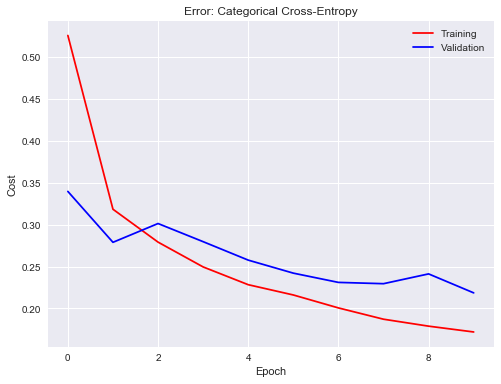

In [215]:
fig, ax = plt.subplots(figsize=(8,6))    
ax.plot(history.history["loss"], c="r")
ax.plot(history.history["val_loss"], c="b")
ax.set_title("Error: Categorical Cross-Entropy")
ax.set_ylabel("Cost")
ax.set_xlabel("Epoch")
ax.legend(["Training", "Validation"], loc="best");